# Solutions

1. [Tidy Data with melt](#1.-Tidy-Data-with-melt)
1. [Reshaping by Pivoting](#2.-Reshaping-by-Pivoting)
1. [Common Messy Datasets](#3.-Common-messy-datasets)

## 1. Tidy Data with `melt`

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 40

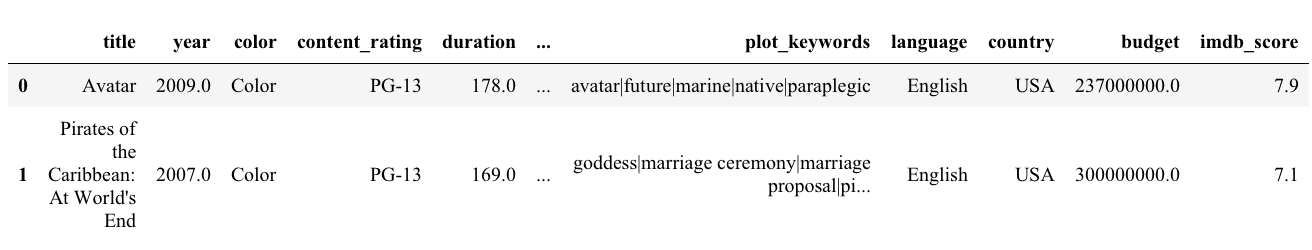

In [2]:
movie = pd.read_csv('../data/movie.csv')
movie.head(2)

### Exercise 1
<span  style="color:green; font-size:16px">Read in the movie dataset. Select the title column and all of the actor name columns. Restructure the dataset so that there are only three variables - the title of the movie, the actor number (1, 2, or 3), and the actor name. Sort the result by title and output the result.</span>

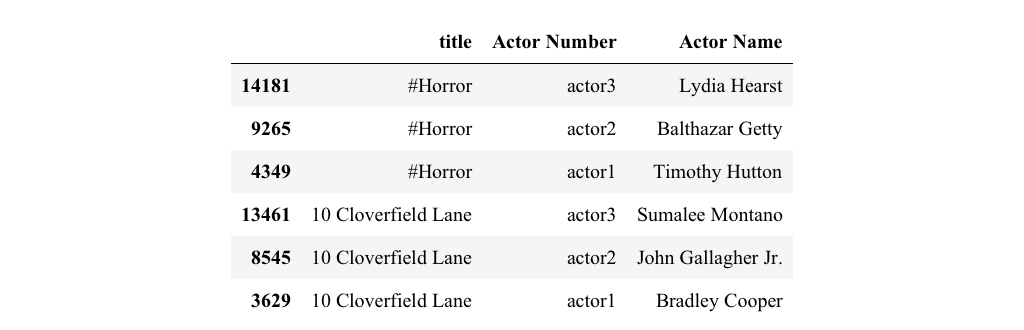

In [3]:
actor_tidy = movie.melt(id_vars='title', 
                        value_vars=['actor1', 'actor2', 'actor3'], 
                        var_name='Actor Number',
                        value_name='Actor Name').sort_values('title')
actor_tidy.head(6)

### Exercise 2
<span  style="color:green; font-size:16px">Using the original movie dataset (and keeping its structure), attempt to count the total appearances of each actor in the dataset regardless whether they are 1, 2, or 3. Then repeat this task with your tidy dataset.</span>

We have not covered how to do the first part of the question. It becomes very easy with tidy data.

In [4]:
actor_ct = actor_tidy['Actor Name'].value_counts()
actor_ct.head()

Robert De Niro    53
Morgan Freeman    43
Bruce Willis      38
Matt Damon        37
Steve Buscemi     36
Name: Actor Name, dtype: int64

Advanced Pandas for first part. This is a pandas trick that uses the **`add`** method to add Series together:

In [5]:
vc1 = movie['actor1'].value_counts()
vc2 = movie['actor2'].value_counts()
vc3 = movie['actor3'].value_counts()

In [6]:
actor_ct2 = vc1.add(vc2, fill_value=0) \
               .add(vc3, fill_value=0) \
               .astype(int) \
               .sort_values(ascending=False)
actor_ct2.head()

Robert De Niro    53
Morgan Freeman    43
Bruce Willis      38
Matt Damon        37
Steve Buscemi     36
dtype: int64

### Exercise 3
<span  style="color:green; font-size:16px">Tidy the dataset in the `tidy/employee_messy1.csv` file. It contains the count of all employees by race and gender.</span>

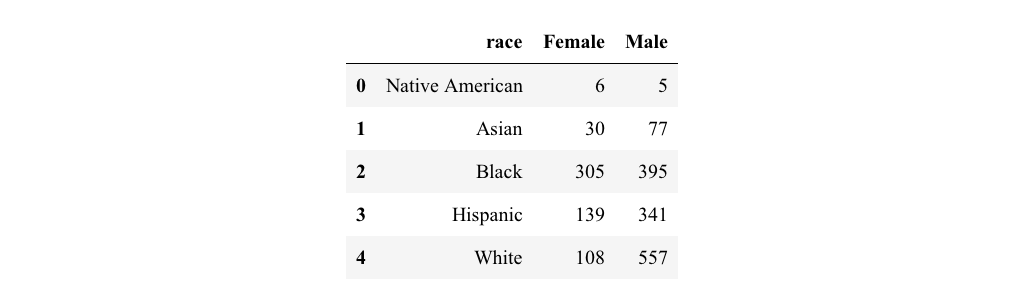

In [7]:
em = pd.read_csv('../data/tidy/employee_messy1.csv')
em

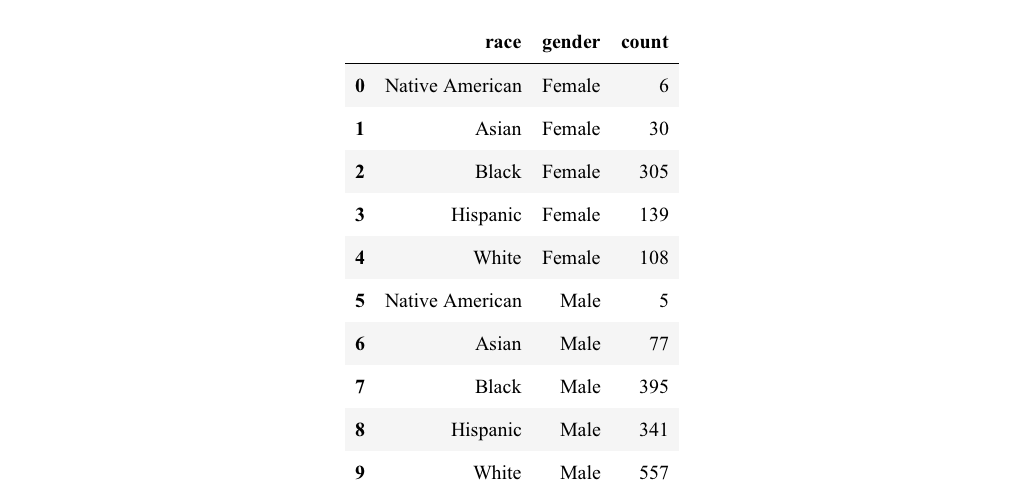

In [8]:
em.melt(id_vars='race', value_vars=['Female', 'Male'], 
        var_name='gender', value_name='count')

### Exercise 4
<span  style="color:green; font-size:16px">Tidy the dataset in the `tidy/employee_messy2.csv` file. It contains the count of all employees by department, race and gender.</span>

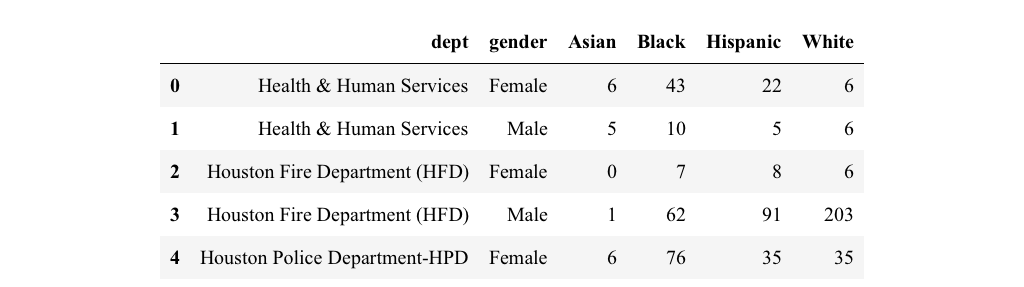

In [9]:
em2 = pd.read_csv('../data/tidy/employee_messy2.csv')
em2.head()

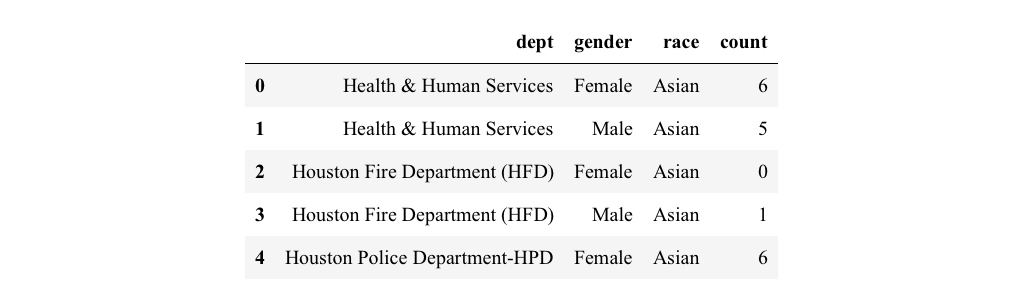

In [10]:
em2.melt(id_vars=['dept', 'gender'], 
         var_name='race', 
         value_name='count').head()

### Exercise 5
<span  style="color:green; font-size:16px">Tidy the dataset in the `tidy/employee_salary_stats.csv` file. Save the tidy dataset to a variable and then select all the median salaries. The select all the median salaries with the original 'messy' dataset. Which one is easier to read summary statistics from?</span>

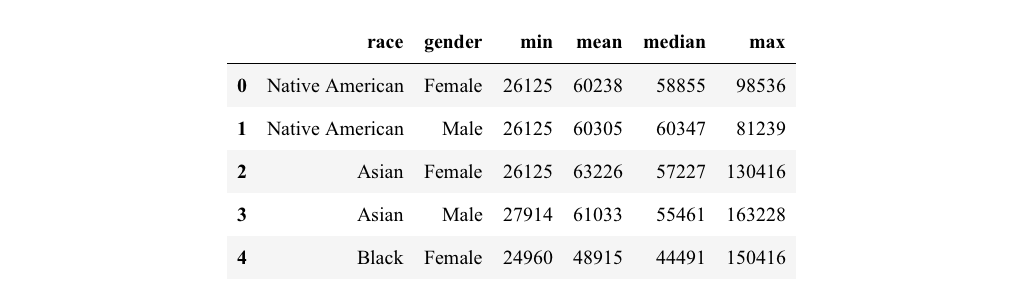

In [11]:
em_stats = pd.read_csv('../data/tidy/employee_salary_stats.csv')
em_stats.head()

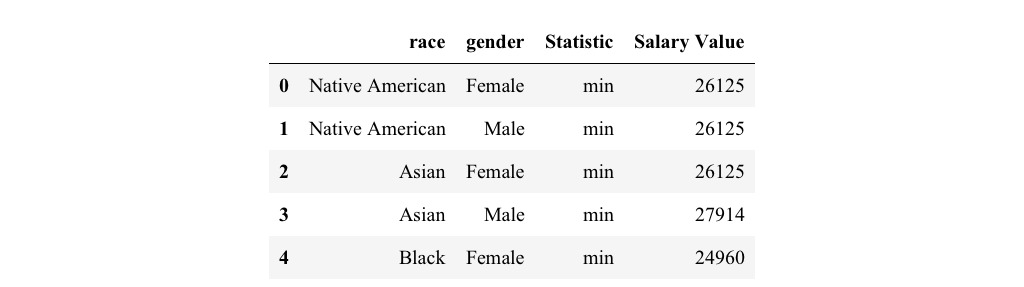

In [12]:
df_tidy = em_stats.melt(id_vars=['race', 'gender'], 
                        var_name='Statistic', 
                        value_name='Salary Value')
df_tidy.head()

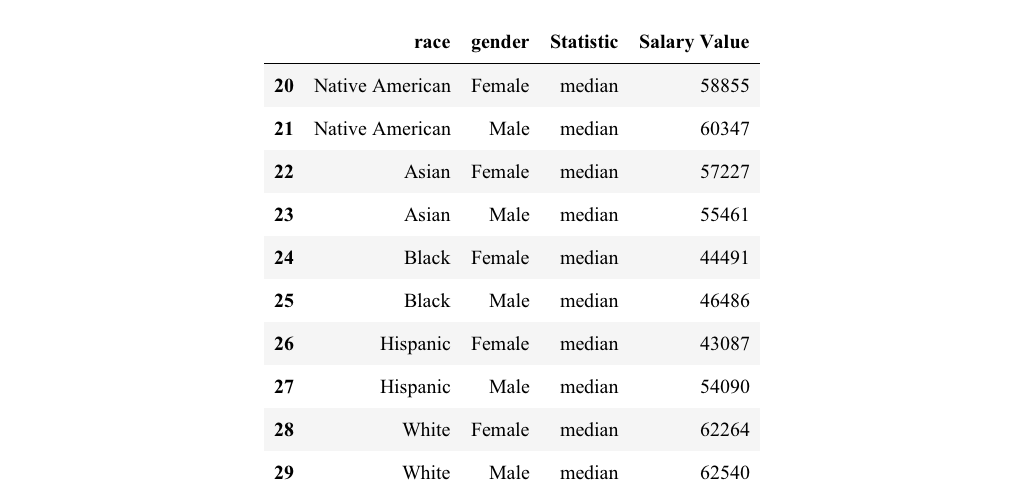

In [13]:
filt = df_tidy['Statistic'] == 'median'
df_tidy[filt]

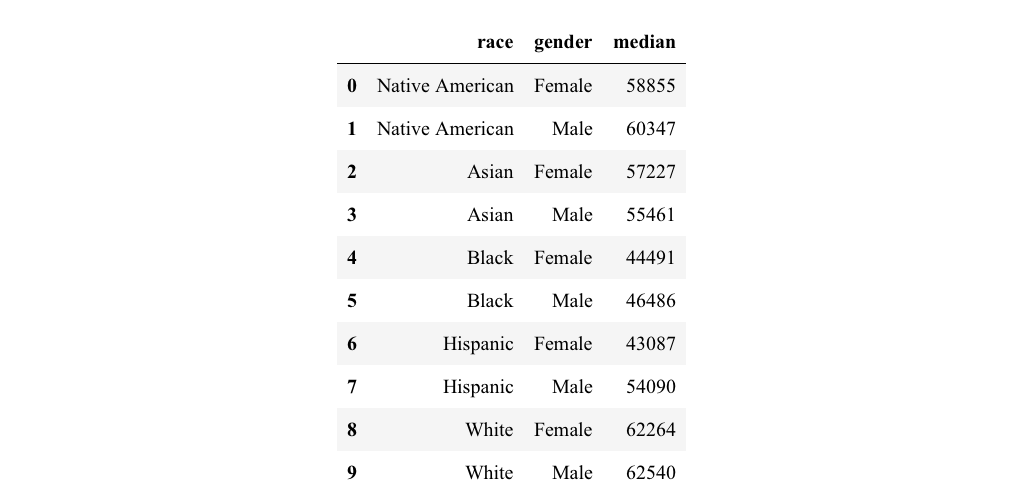

In [14]:
cols = ['race', 'gender', 'median']
em_stats[cols]

The messy dataset is probably easier, as it shows all the aggregated statistics for each race and gender in a single row. Aggregated values are generally easier to read as "messy" datasets.

## 2. Reshaping by Pivoting

### Exercise 1
<span  style="color:green; font-size:16px">Read the file **`clean_movie1.csv`** and then use the **`pivot`** method to put the country names as the columns. Put the **`count`** as the new values for the DataFrame.</span>

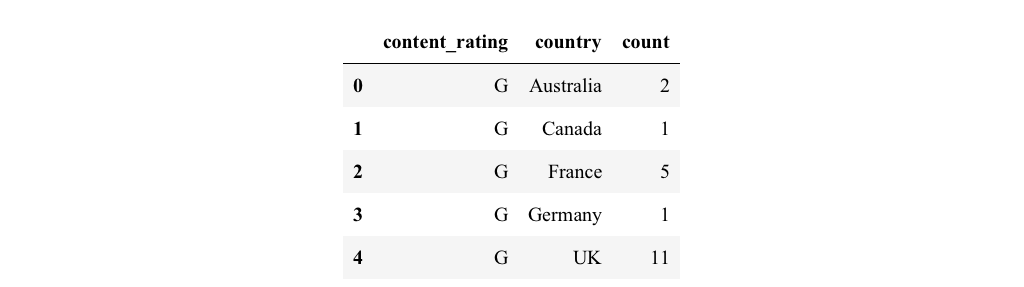

In [15]:
cm = pd.read_csv('../data/tidy/clean_movie1.csv')
cm.head()

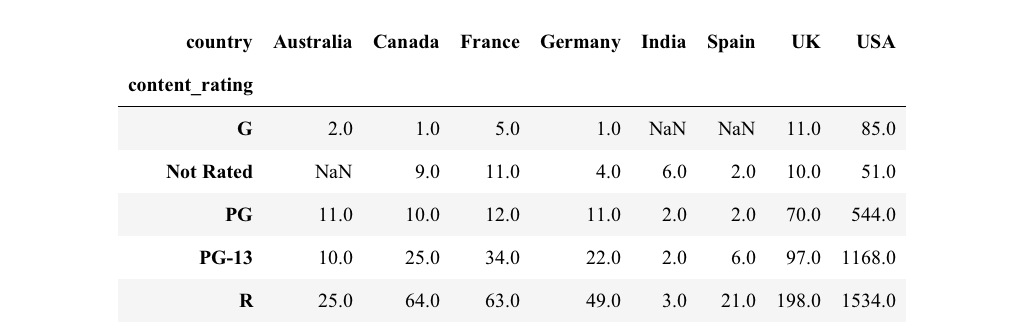

In [16]:
cm.pivot(index='content_rating', columns='country', values='count')

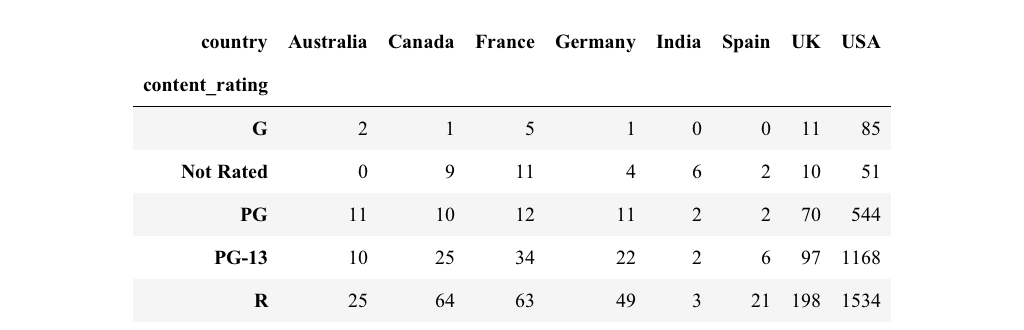

In [17]:
# can fill in the missing value with 0 and change type to integer
cm.pivot(index='content_rating', columns='country', values='count').fillna(0).astype(int)

### Exercise 2
<span  style="color:green; font-size:16px">Read in the NYC deaths dataset and select only males from 2007. Pivot this information so we can more clearly see the breakdown of causes of death by race. Assign the result to a variable.</span>

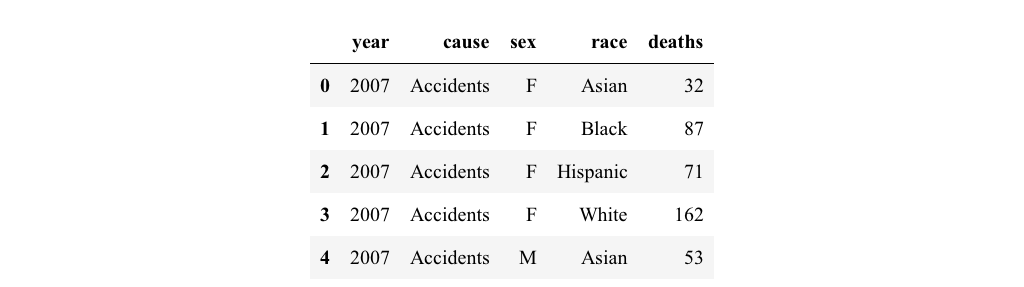

In [18]:
nyc_deaths = pd.read_csv('../data/nyc_deaths.csv')
nyc_deaths.head()

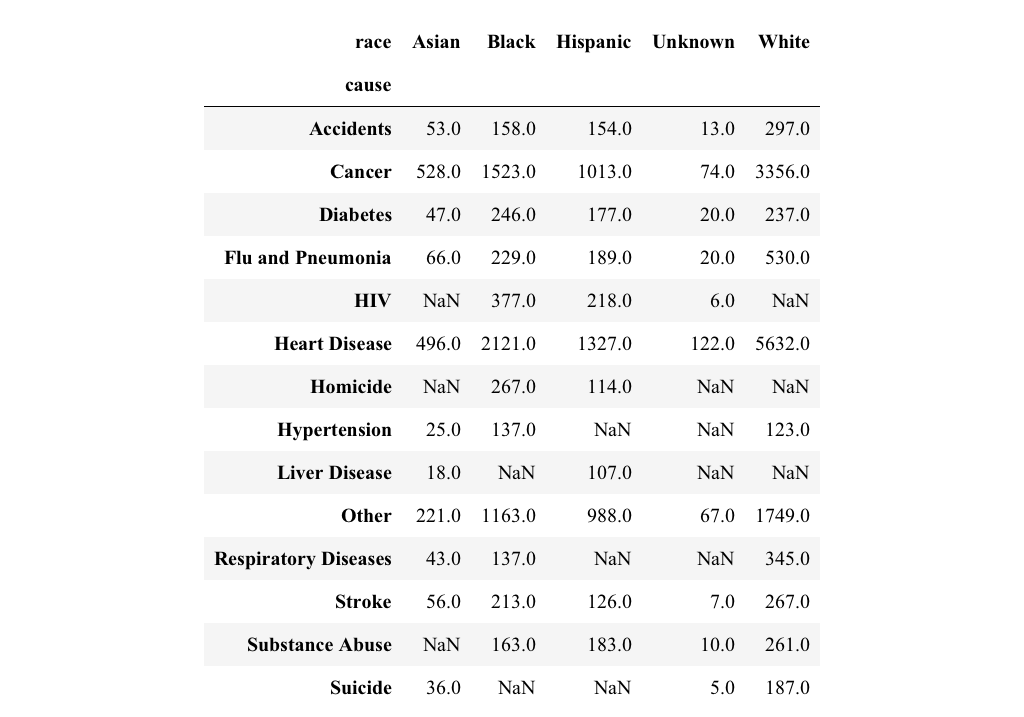

In [19]:
male_2007 = nyc_deaths[(nyc_deaths['year'] == 2007) & (nyc_deaths['sex'] == 'M')]
race_death = male_2007.pivot(index='cause', columns='race', values='deaths')
race_death

### Exercise 3
<span  style="color:green; font-size:16px">Use the result from Exercise 2 and highlight the leading cause of death for each race. Is it the same for each one?</span>

Cancer is the most common among Asian and Pacific Islanders. Heart Disease for everyone else.

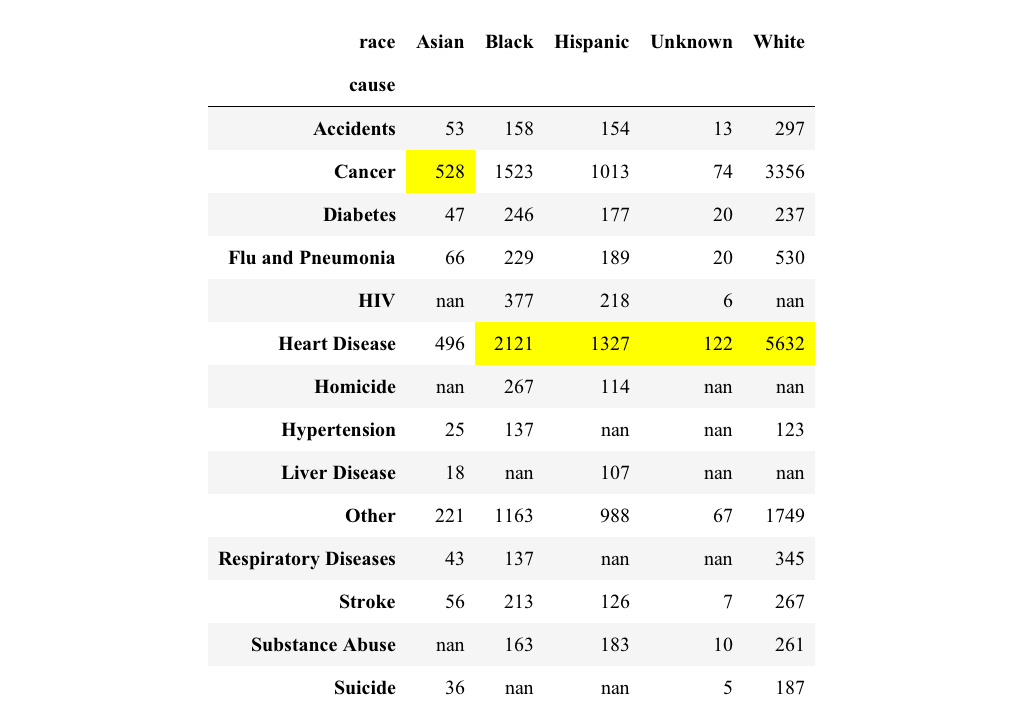

In [20]:
race_death.style.highlight_max()

### Exercise 4
<span  style="color:green; font-size:16px">Read in the flights dataset. Find the total number of flights from each airline by their origin airport. Hint: When making a pivot table of just frequency, its not necessary to have a `values` column. Save the results to a variable.</span>

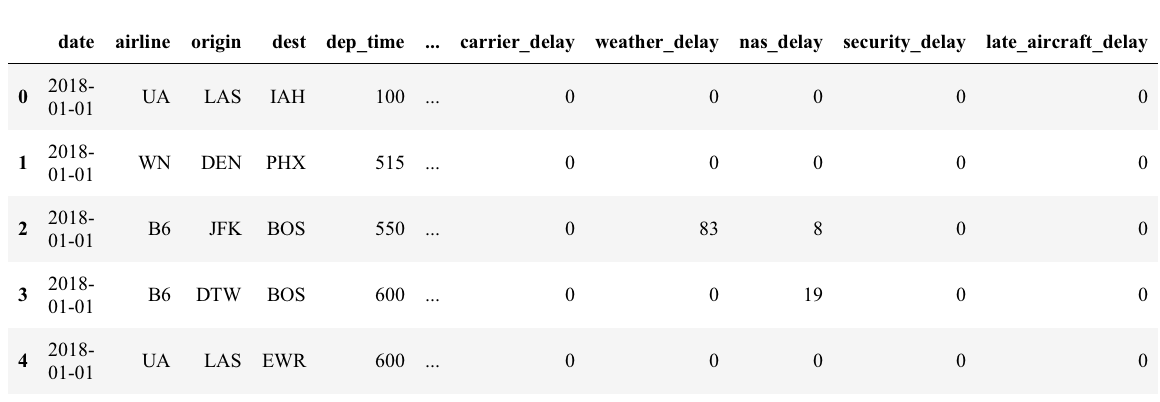

In [21]:
flights = pd.read_csv('../data/flights.csv')
flights.head()

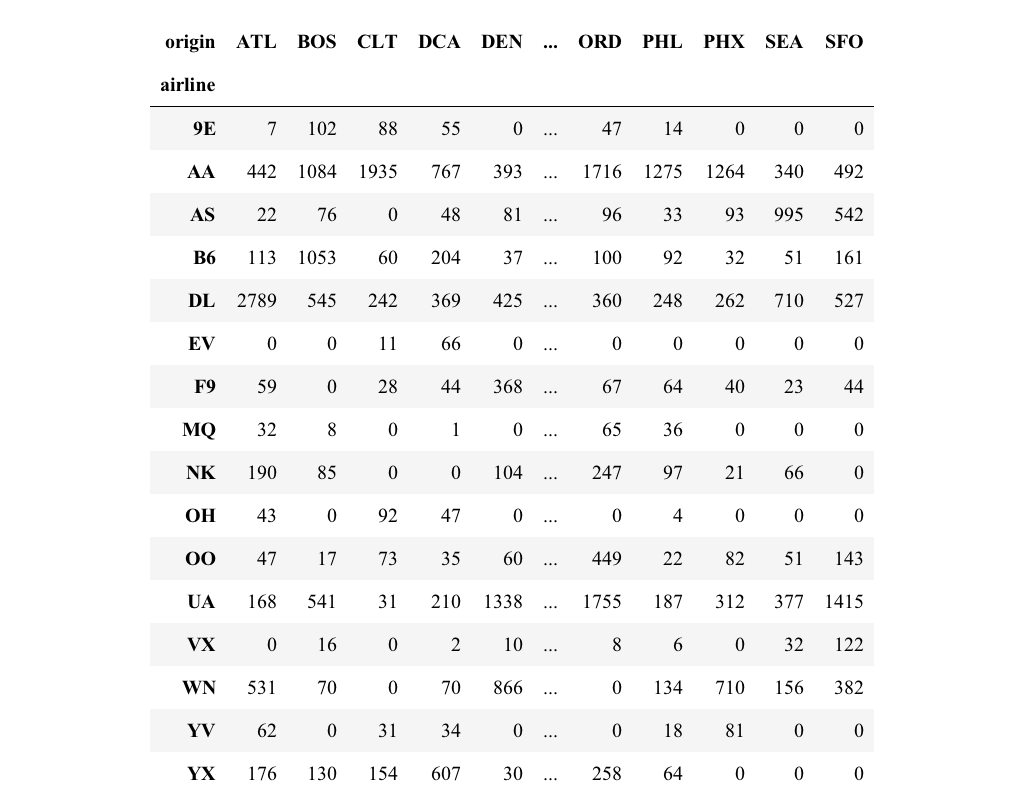

In [22]:
airline_origin = flights.pivot_table(index='airline', columns='origin', 
                                     aggfunc='size', fill_value=0)
airline_origin

### Exercise 5
<span  style="color:green; font-size:16px">Highlight the origin airport with the most flights for each airline. Do a few online searches to determine if those airports are hubs for those airlines.</span>

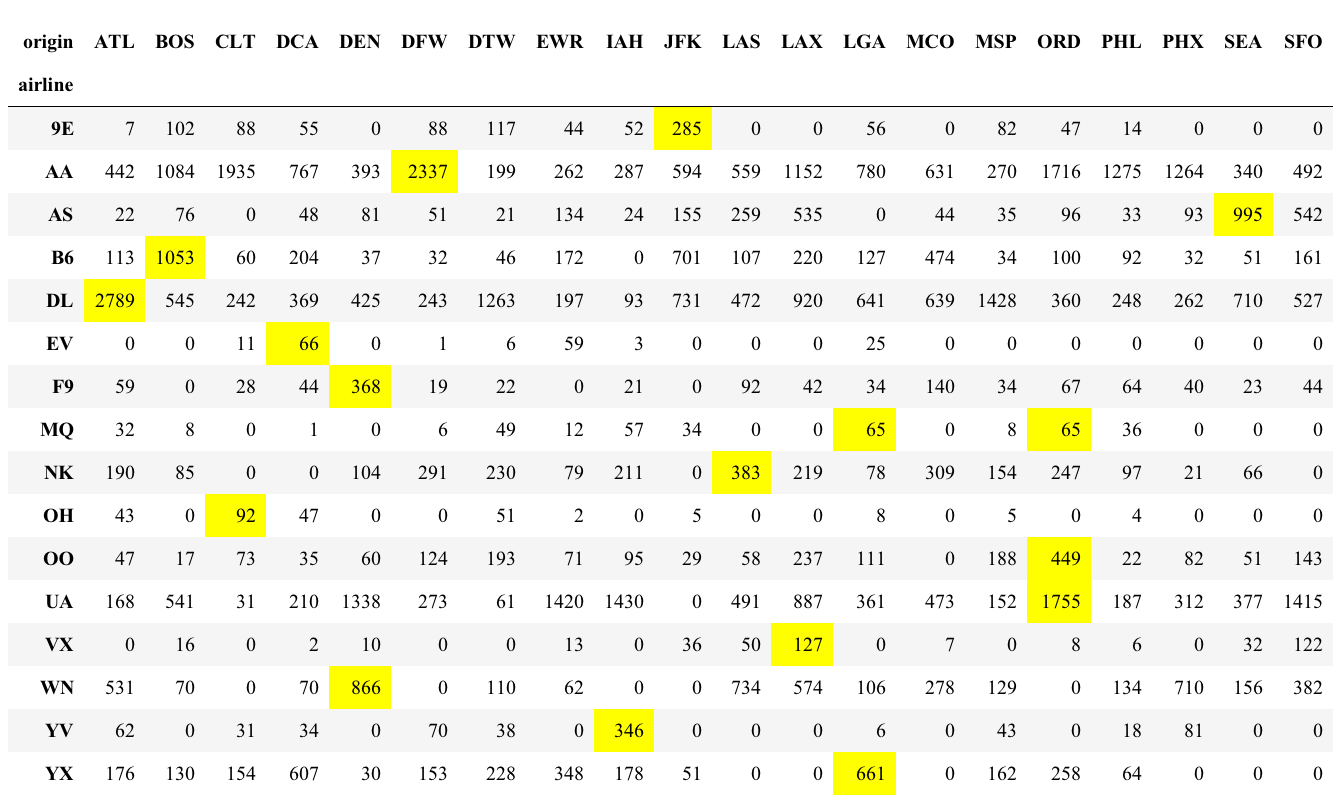

In [23]:
airline_origin.style.highlight_max(axis=1)

American Airlines (AA) has a [hub at DFW](https://www.quora.com/Where-are-the-American-Airlines-hubs)

### Exercise 6
<span  style="color:green; font-size:16px">Read in the bikes dataset. For each type of weather event (the `events` column) find the median temperature for males and females.</span>

In [24]:
bikes = pd.read_csv('../data/bikes.csv')

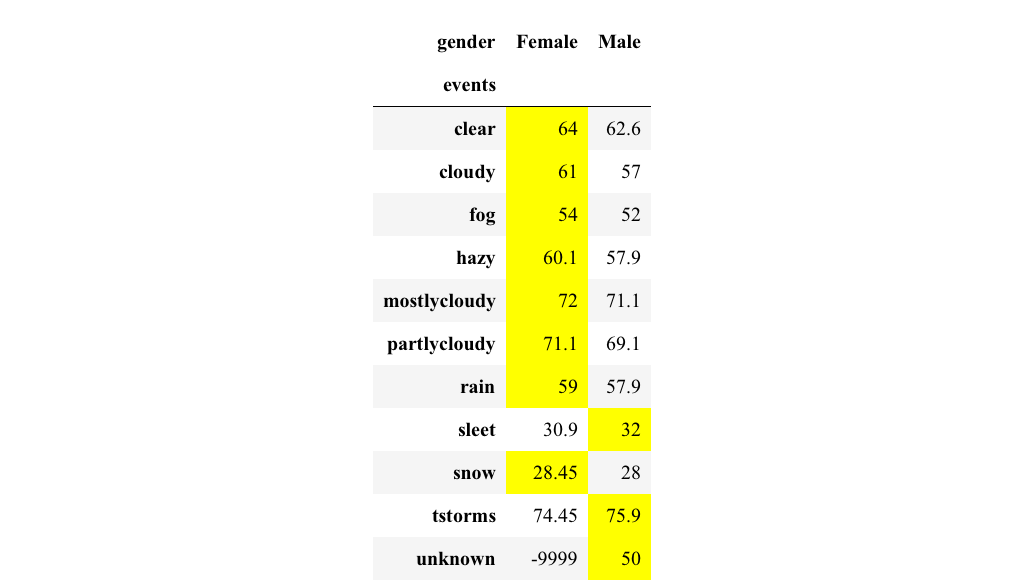

In [25]:
bikes.pivot_table(index='events', columns='gender', 
                  values='temperature', aggfunc='median').style.highlight_max(axis='columns')

### Exercise 7
<span  style="color:green; font-size:16px">Reshape the movie dataset so that there are two columns, one for all of the actors and one for the content rating of each of their respective movies. Filter this DatFrame so that it contains the top 10 most common actors. Then create a table that displays the number of movies each actor made by content rating. The actor names should be in the index, with the content ratings in the columns, with the counts as the values.</span>

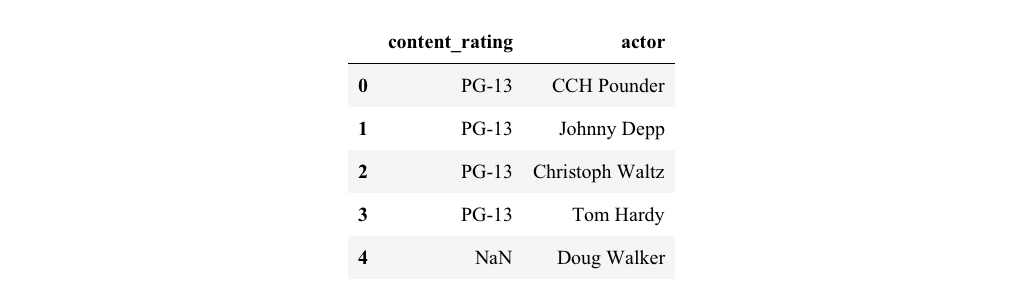

In [26]:
actor_rating = movie.melt(id_vars='content_rating', value_vars=['actor1', 'actor2', 'actor3'],
                         value_name='actor')
actor_rating = actor_rating.drop(columns='variable')
actor_rating.head()

In [27]:
top10_actors = actor_rating['actor'].value_counts().index[:10]
top10_actors

Index(['Robert De Niro', 'Morgan Freeman', 'Bruce Willis', 'Matt Damon',
       'Steve Buscemi', 'Johnny Depp', 'Brad Pitt', 'Nicolas Cage',
       'Will Ferrell', 'Bill Murray'],
      dtype='object')

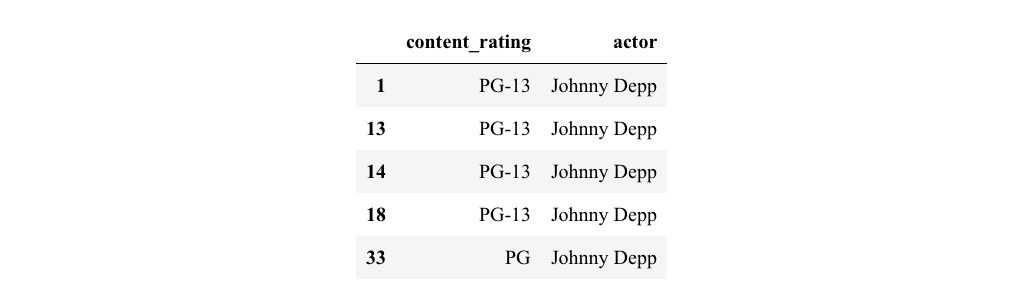

In [28]:
actor_rating_top10 = actor_rating[actor_rating['actor'].isin(top10_actors)]
actor_rating_top10.head()

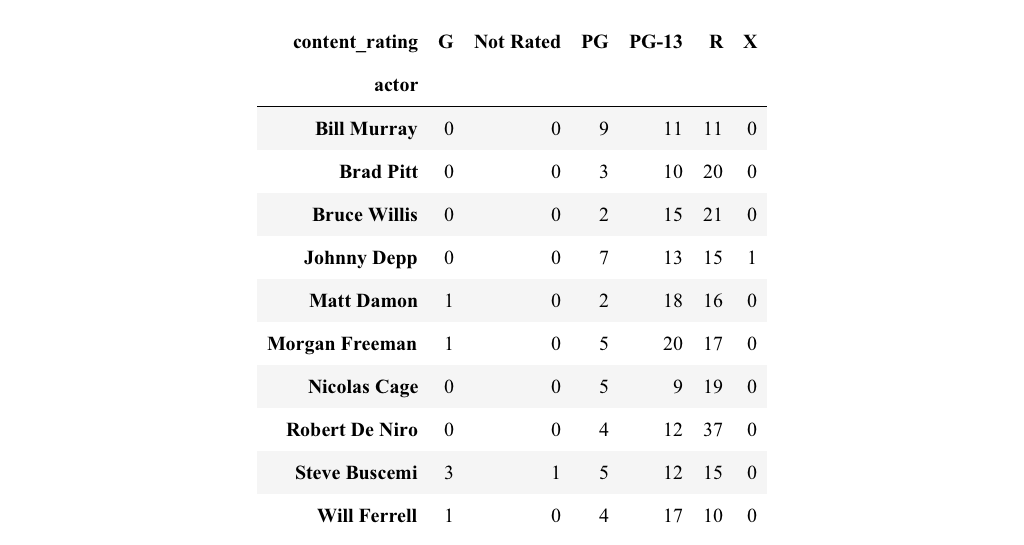

In [29]:
actor_rating_top10.pivot_table(index='actor', columns='content_rating', aggfunc='size', fill_value=0)

## 3. Common messy datasets

### Exercise 1

<span  style="color:green; font-size:16px">Make the `country_hour_price.csv` dataset tidy by putting all the hour columns into a single column.</span>

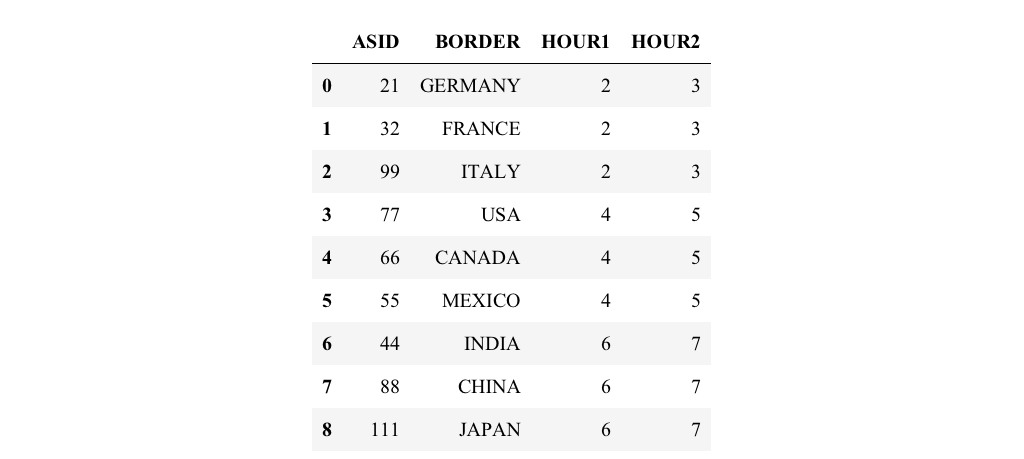

In [30]:
df = pd.read_csv('../data/tidy/country_hour_price.csv')
df

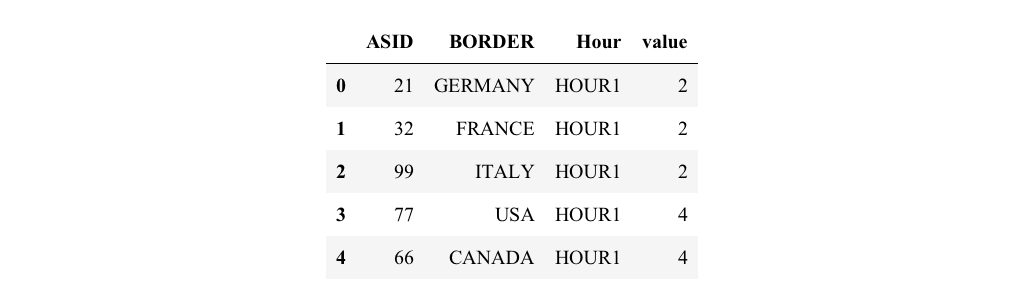

In [31]:
df_tidy = df.melt(id_vars=['ASID', 'BORDER'], 
                  value_vars=['HOUR1', 'HOUR2'],
                  var_name = 'Hour')
df_tidy.head()

In [32]:
df_tidy.dtypes

ASID       int64
BORDER    object
Hour      object
value      int64
dtype: object

### Exercise 2
<span  style="color:green; font-size:16px">If the resulting DataFrame from Exercise 1 has the strings 'HOUR1' and 'HOUR2' as values in the hour column, then extract just the numerical part of the strings and reassign the result to the hour column.</span>

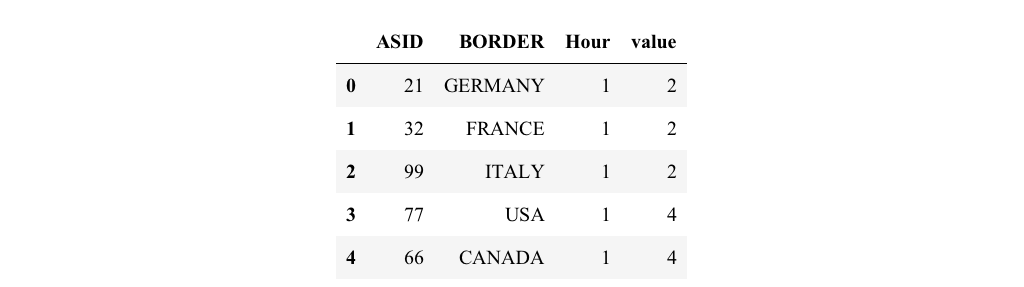

In [33]:
df_tidy['Hour'] = df_tidy['Hour'].str.extract('(\d)').astype('int')
df_tidy.head()

In [34]:
df_tidy.dtypes

ASID       int64
BORDER    object
Hour       int64
value      int64
dtype: object

### Exercise 3
<span  style="color:green; font-size:16px">Tidy the `tidy/flights_status.csv` dataset.</span>

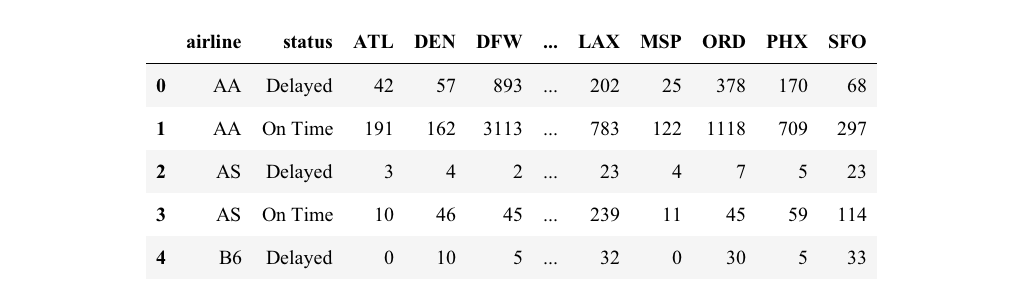

In [35]:
fs = pd.read_csv('../data/tidy/flight_status.csv')
fs.head()

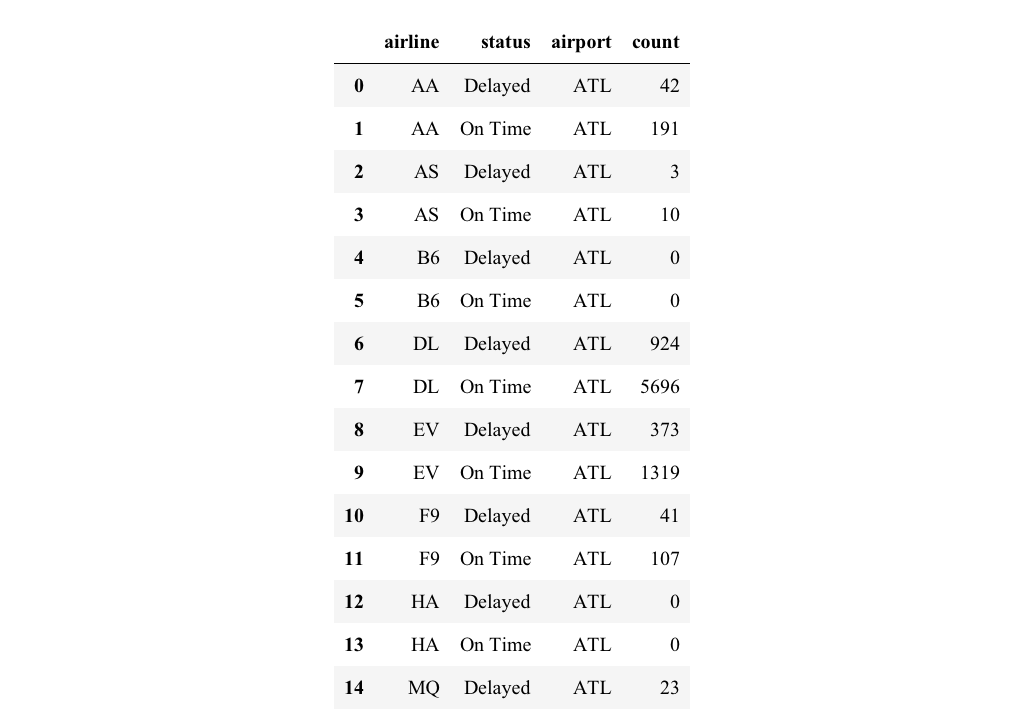

In [36]:
fs1 = fs.melt(id_vars=['airline', 'status'], var_name='airport', value_name='count')
fs1.head(15)

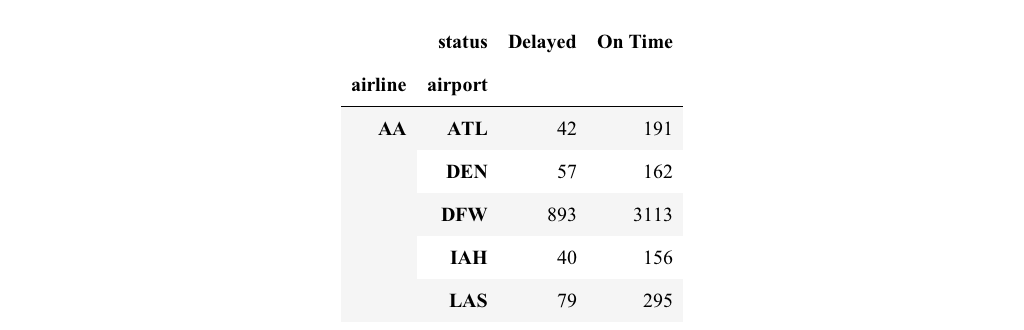

In [37]:
fs_tidy = fs1.pivot_table(index=['airline', 'airport'], columns='status', values='count', aggfunc='max')
fs_tidy.head()

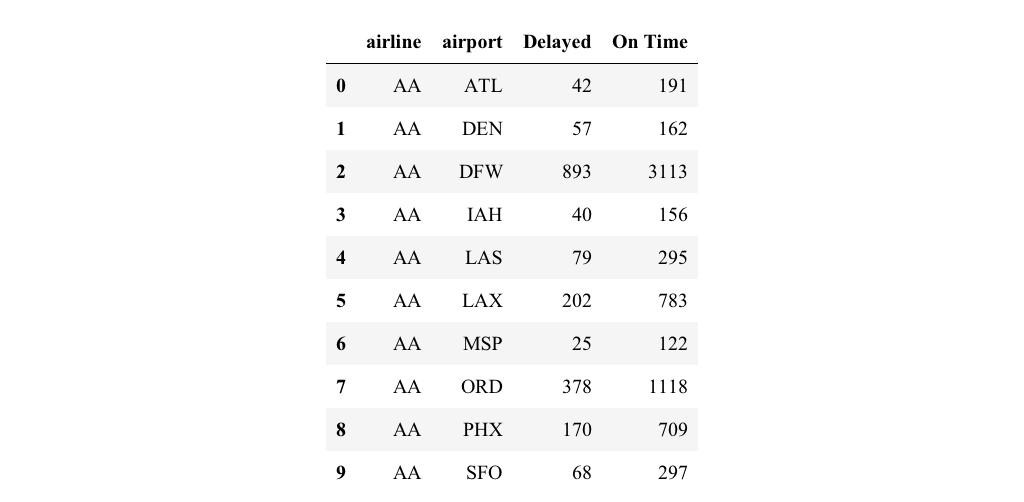

In [38]:
fs_tidy_final = fs_tidy.reset_index().rename_axis(None, axis='columns')
fs_tidy_final.head(10)

### Exercise 4
<span  style="color:green; font-size:16px">Tidy the `tidy/metrics.csv` dataset.</span>

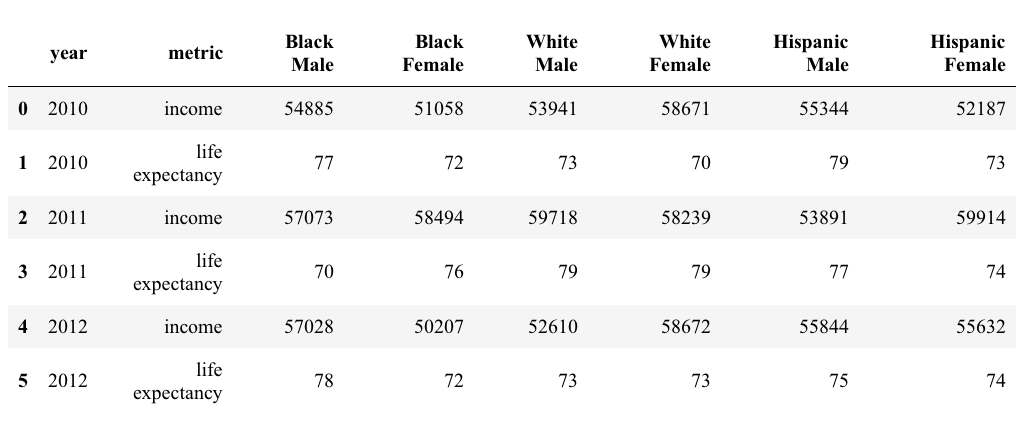

In [39]:
df = pd.read_csv('../data/tidy/metrics.csv')
df

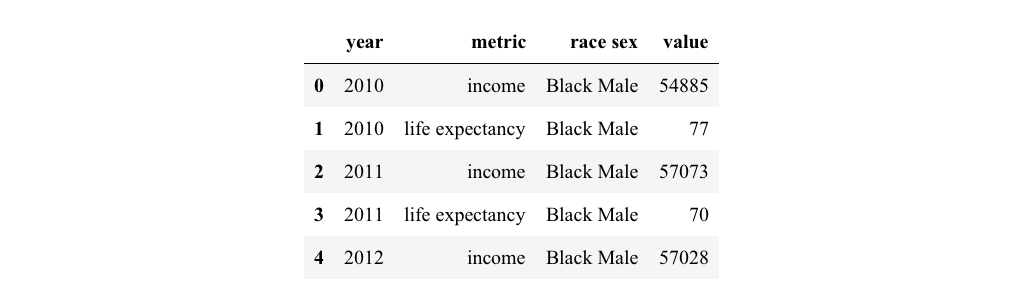

In [40]:
df1 = df.melt(id_vars=['year', 'metric'], var_name='race sex')
df1.head()

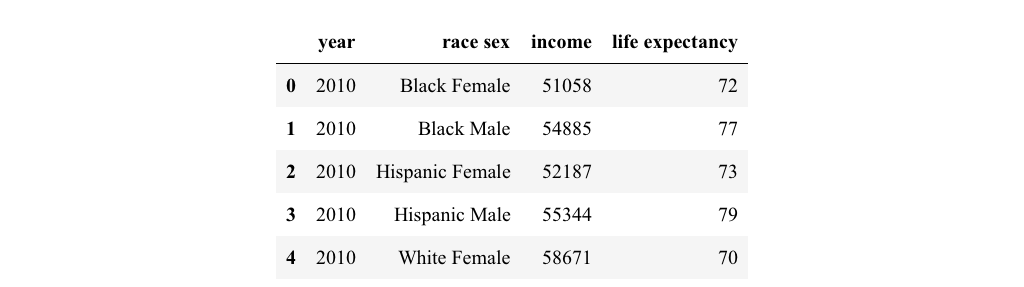

In [41]:
df2 = df1.pivot_table(index=['year', 'race sex'], columns='metric', values='value', aggfunc='max')
df3 = df2.reset_index().rename_axis(None, axis='columns')
df3.head()

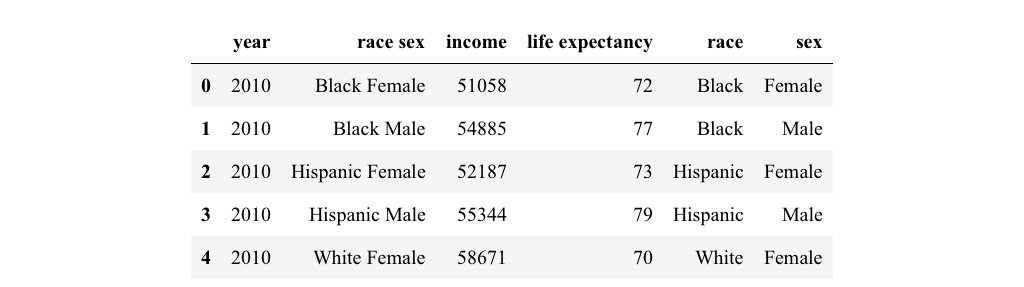

In [42]:
df3[['race', 'sex']] = df3['race sex'].str.split(expand=True)
df3.head()

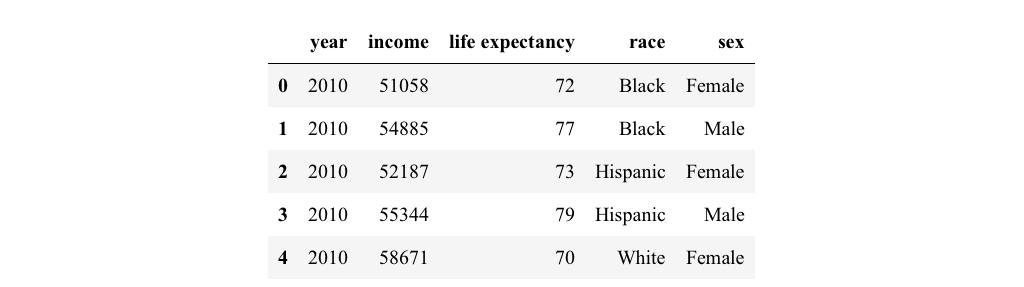

In [43]:
df4 = df3.drop(columns='race sex')
df4.head()